# Titanic survival

## Imports

In [140]:
import numpy as np

import pandas as pd
pd.options.display.max_rows = 120

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

## Helpers

In [383]:
def plot_correlation_map(df):
    _ , ax = plt.subplots( figsize =( 15 , 10 ) )
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar=True, cbar_kws={ 'shrink' : .8 }, 
        ax=ax, 
        annot = True, annot_kws = { 'fontsize' : 12 })

## Data

In [174]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# TODO: use common preprocesing
train_data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
train_data['Sex'].replace(['female', 'male'], [0, 1], inplace=True)

test_data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
test_data['Sex'].replace(['female', 'male'], [0, 1], inplace=True)

titanic_data = train_data.append( test_data , ignore_index = True )

In [367]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


In [317]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [117]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.535433
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


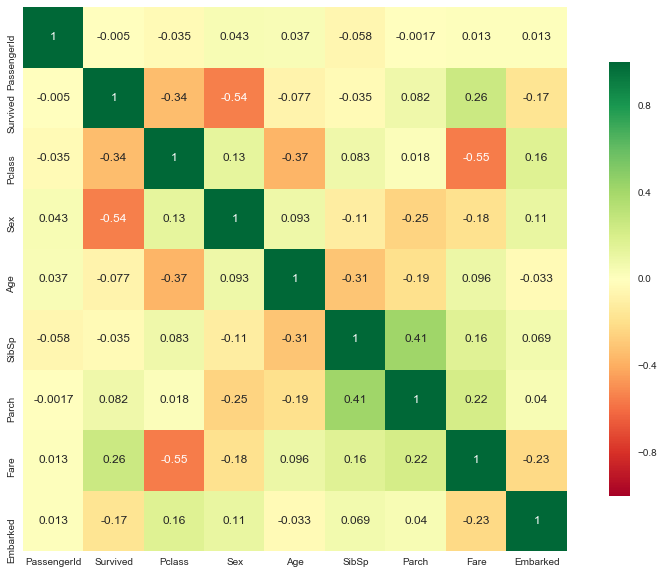

In [384]:
plot_correlation_map(train_data)

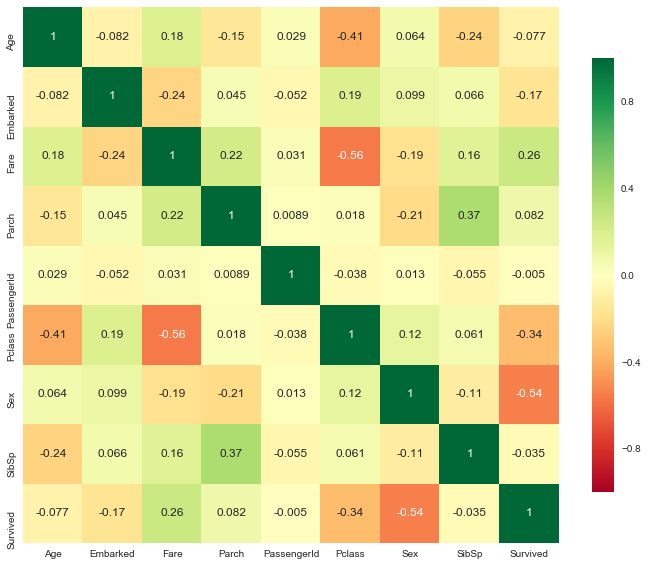

In [121]:
plot_correlation_map(titanic_data)

## Data engineering

In [375]:
data = train_data.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


In [382]:
# 3 Embarked missing, fill in with 2 aka S - South Hampton
data['Embarked'].fillna(2, inplace=True)

# TODO: Age correlation dropped, predict age based on pclass, sibsp, fare, parch
data['Age'].fillna(data['Age'].median(), inplace=True)
# data.groupby(['Sex','Pclass','Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


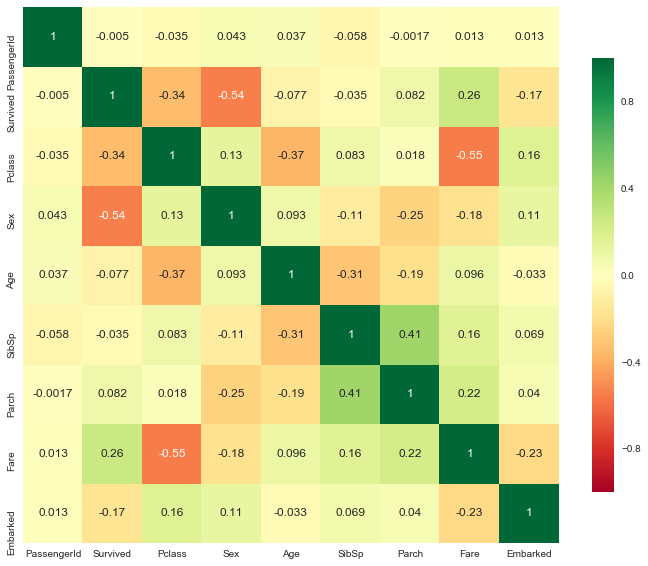

In [350]:
plot_correlation_map(data)

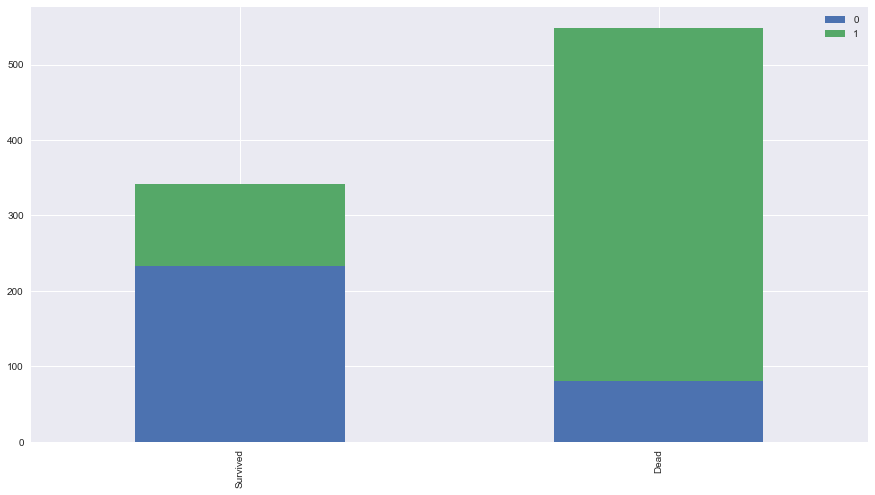

In [123]:
# Sex is highly correlated with Survival
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
dead_sex.shape
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

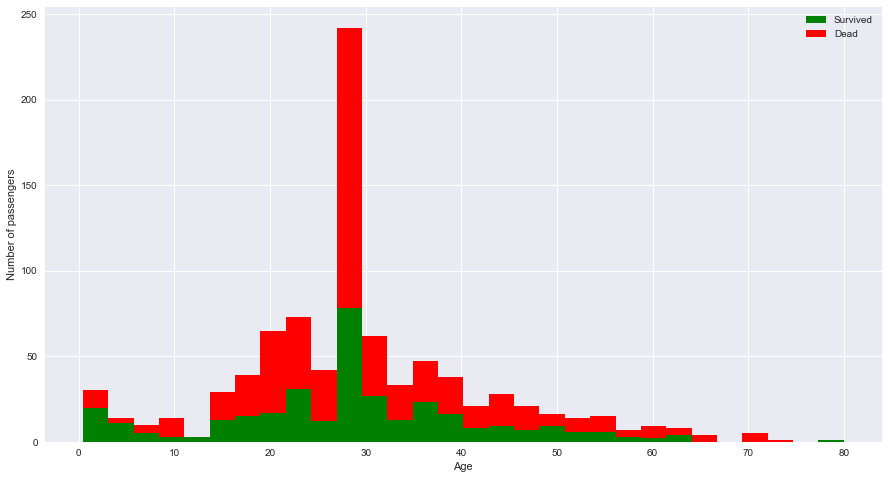

In [137]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

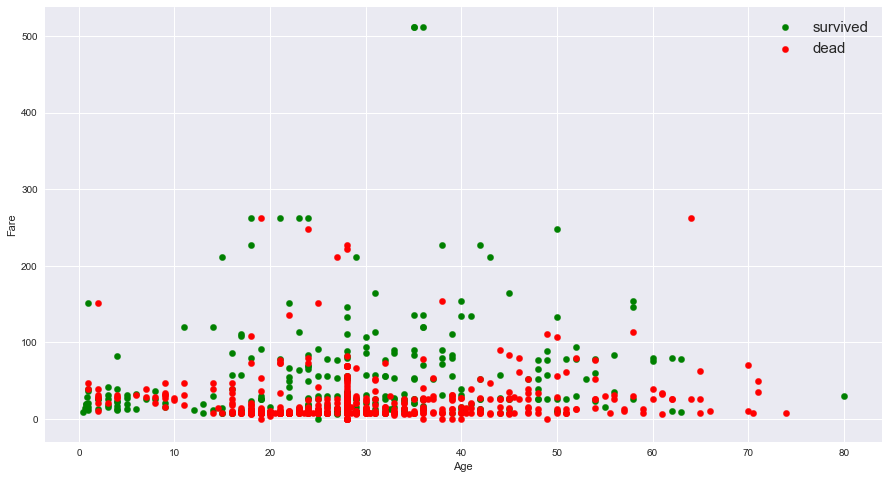

In [133]:
survived = data['Survived']

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[survived==1]['Age'],data[survived==1]['Fare'],c='green',s=40)
ax.scatter(data[survived==0]['Age'],data[survived==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

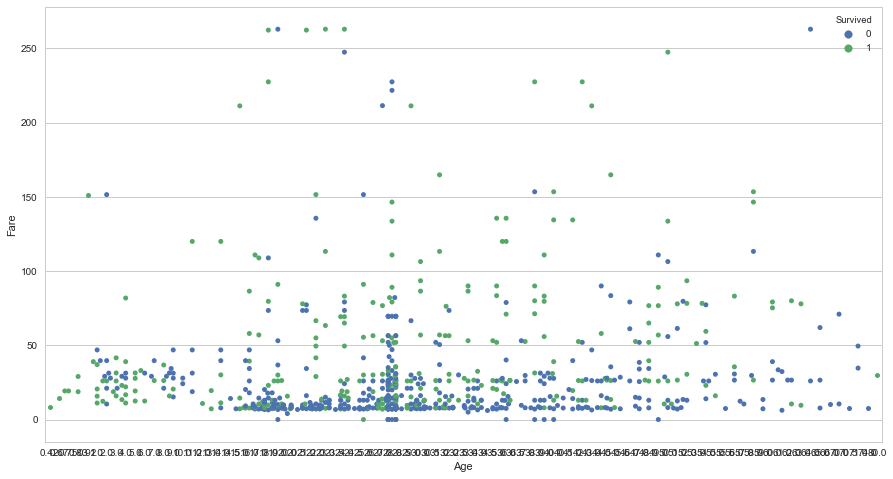

In [163]:
_, ax = plt.subplots(figsize =( 15 , 8 ))
d = data[data['Fare']<500] # remove outliers
sns.swarmplot(x="Age", y="Fare", hue="Survived", data=d, ax=ax)

## Training

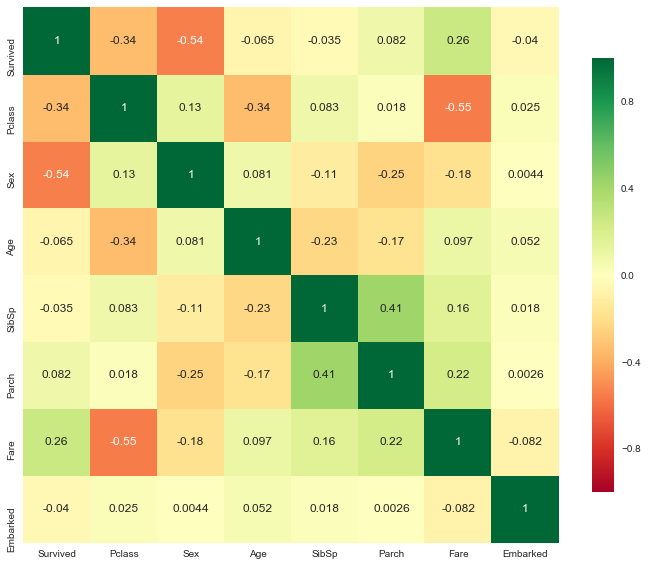

In [242]:
plot_correlation_map(data)

In [219]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


In [304]:
mask = np.random.rand(len(data)) < 0.8
mask.shape

(891,)

In [313]:
X_columns = ['Sex', 'Pclass', 'Fare', 'Parch', 'Age', 'SibSp']
X_train = data[mask][X_columns].values
X_valid = data[~mask][X_columns].values
X_train.shape

(722, 6)

In [315]:
y_columns = ['Survived'] 
y_train = data[mask][y_columns].values
y_valid = data[~mask][y_columns].values
y_train.shape

(722, 1)

In [323]:
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical

tf.reset_default_graph()

net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# one-hot encoding
Y_train = to_categorical(y_train, 2)
Y_valid = to_categorical(y_valid, 2)

model = tflearn.DNN(net)
model.fit(X, Y, validation_set=(X_valid, Y_valid), batch_size=10, show_metric=True)

Training Step: 899  | total loss: 0.48513 | time: 0.294s
| Adam | epoch: 010 | loss: 0.48513 - acc: 0.7830 -- iter: 890/891
Training Step: 900  | total loss: 0.47260 | time: 1.303s
| Adam | epoch: 010 | loss: 0.47260 - acc: 0.7947 | val_loss: 0.43567 - val_acc: 0.8107 -- iter: 891/891
--


## Evaluation

In [327]:
model.evaluate(X_valid, Y_valid)

[0.81065088933741558]

## Prediction

In [356]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [353]:
X_test = test_data[X_columns].values
X_test.shape

(418, 6)

In [365]:
Y_test = model.predict(X_test)
Y_test[:5]

[[0.8752791285514832, 0.12472085654735565],
 [0.5652192234992981, 0.4347807466983795],
 [0.8857542276382446, 0.11424576491117477],
 [0.8651280999183655, 0.1348719298839569],
 [0.46318674087524414, 0.5368131995201111]]

In [362]:
# TODO: handle missing predictions
y_test = pd.DataFrame(Y_test).idxmax(axis=1)
y_test[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
dtype: float64

In [357]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_test})
output.to_csv('data/output.csv',index=False)

## References

* http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
* https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial/run/775411
* https://www.kaggle.com/zhiboyang/d/ludobenistant/hr-analytics/feature-selection-and-prediction/notebook
* https://www.kaggle.com/sinakhorami/titanic-best-working-classifier